In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from src.Luminosity.special_radii import get_thermr, get_photosphere
from src.Calculators.ray_cesare import ray_maker
fix = 844
m = 6
Rt = (10**m)**(1/3)

In [4]:
# Rsol_to_cm = 6.957e10 # [cm]
# r = (3*Vol[idx]/(4*np.pi))
# print(r)

In [5]:
# start = 200
# stop = 10_000 #400 * Rt
# log_start = np.log10(start)
# log_stop = np.log10(stop)
# num = 4000
# log_radii = np.linspace(log_start, log_stop, num) #simulator units
# radii = 10**log_radii
# # print(radii)
# # radii2 = np.logspace(log_start, log_stop, num)
# # print(np.allclose(radii, radii2))

In [6]:
test_value = 600
start = 100
stop = 10_000 #400 * Rt
log_start = np.log10(start)
log_stop = np.log10(stop)
num = test_value * 2
log_radii = np.linspace(log_start, log_stop, num) #simulator units
radii_test = 10**log_radii

In [7]:
idx = np.argmin(np.abs(test_value-radii_test))
print(idx)
print(radii_test[idx+1]-radii_test[idx])

467
2.313360319553908


In [8]:
# ph1 = np.loadtxt('data/dataph400.txt')
# ph2 = np.loadtxt('data/dataph1500.txt')
# ph3 = np.loadtxt('data/dataph4000.txt')
# plt.figure(figsize = [8,5])
# plt.scatter(np.arange(192), ph1, s = 7, c = 'k', marker = '+', label = 'num = 400')
# plt.scatter(np.arange(192), ph2, s = 5, c = 'b', label = 'num = 1500')
# plt.scatter(np.arange(192), ph3, s = 3, c = 'r', label = 'num = 4000')
# plt.xlabel('Observers')
# plt.ylabel(r'R$_{ph}$ [R$_\odot$]')
# plt.grid()
# plt.legend()
# plt.savefig('Figs/spacing_radius.png')
# plt.show()

In [9]:
rays_T, rays_den, _, radii = ray_maker(fix, m, 600)

/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [10]:
rays_kappa, rays_cumulative_kappas, rays_photo = get_photosphere(rays_T, rays_den, radii)
rays_photo /=  6.957e10

In [30]:
plot_kappa = np.zeros((len(rays_kappa),len(radii)))
for i in range(len(rays_kappa)):
    for j in range(len(rays_kappa[i])):
        temp = rays_kappa[i][j]
        plot_kappa[i][-j-1] = temp
        if temp > 5:
            plot_kappa[i][0:-j] = temp
            break
    plot_kappa[i,0:-j] = temp

In [ ]:
# dim_rays = []
# for i in range(len(rays_photo)):
#     idx_photo = np.argmin(np.abs(rays_photo[i]-radii))
#     dim_cell = radii[idx_photo+1]-radii[idx_photo]
#     dim_rays.append(dim_cell/ 6.957e10)

In [27]:
# plt.scatter(np.arange(192),dim_rays)
# plt.xlabel('Observers')
# plt.ylabel(r'Step at R$_{ph}$')
# plt.show()

NameError: name 'dim_rays' is not defined

In [31]:
for j in range(0,len(radii)-2):
    step = radii[j+1]-radii[j]
    for i in range(len(plot_kappa)):
        plot_kappa[i,j] /= step

30904754360.57373
31179327838.24756
31456340765.64795
31735814816.086426
32017771855.4209
32302233943.78174
32589223337.293945
32878762489.81201
33170874054.691406
33465580886.54004
33762906043.024902
34062872786.665527
34365504586.663086
34670825120.723145
34978858276.921875
35289628155.56494
35603159071.0791
35919475553.91943
36238602352.46924
36560564434.99707
36885386991.59863
37213095436.180176
37543715408.42529
37877272775.819336
38213793635.66797
38553304317.13623
38895831383.32031
39241401633.29785
39590042104.26074
39941780073.603516
40296643061.06543
40654658830.90039
41015855394.01074
41380261010.17871
41747904190.25488
42118813698.39453
42493018554.3125
42870548035.543945
43251431679.74219
43635699286.98535
44023380922.12305
44414506917.09668
44809107873.34863
45207214664.18652
45608858437.231445
46014070616.81055
46422882906.458984
46835327291.37598
47251436040.93262
47671241711.20215
48094777147.49609
48522075486.944336
48953170161.08301
49388094898.4668
49826883727.32519

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_86268/2522933726.py:5: RuntimeWarning: divide by zero encountered in power
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_86268/2522933726.py:5: RuntimeWarning: invalid value encountered in multiply
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]


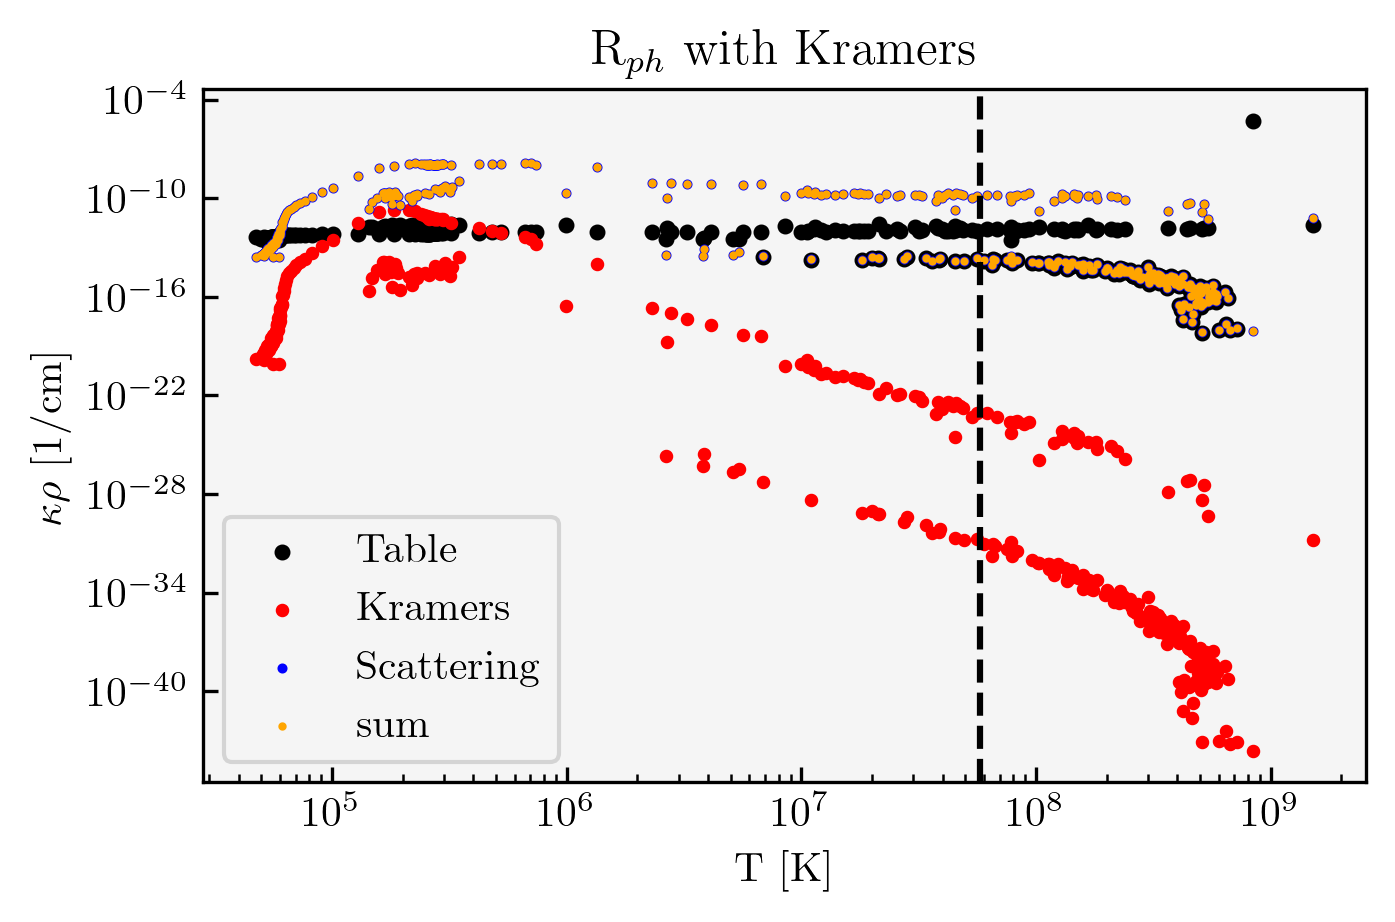

In [39]:
index = 91
data_den = rays_den[index]
data_T =rays_T[index]
kappa = plot_kappa[index]
kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
scattering = (1+0.7389) * 0.2 * data_den 
sum =  (kram + scattering) 
plt.scatter(data_T,kappa, s = 8, c = 'k', label = 'Table')
plt.scatter(data_T, kram, s = 5, c = 'r', label = 'Kramers')
plt.scatter(data_T, scattering, s = 2, c = 'b', label = 'Scattering')
plt.scatter(data_T,sum, s = 1, c = 'orange', label = 'sum')
plt.legend()
plt.axvline(x=np.exp(17.87), c = 'k', linestyle = 'dashed')
plt.xlabel('T [K]')
plt.ylabel(r'$\kappa\rho$ [1/cm]')
plt.loglog()
plt.title(r'R$_{ph}$ with Kramers')
plt.show()

In [ ]:
tau, thermr, cumulative_taus = get_thermr(rays_T, rays_den, radii)
thermr /=  6.957e10

In [ ]:
plot_tau = np.zeros((len(tau),len(radii)))
for i in range(len(tau)):
    for j in range(len(tau[i])):
        temp = tau[i][j]
        plot_tau[i][-j-1] = temp
        if temp > 5:
            plot_tau[i][0:-j] = temp
            break
    plot_tau[i,0:-j] = temp
step = radii[1]-radii[0]
plot_tau = plot_tau/step

In [ ]:
for index in range(91,92):
    data_den = rays_den[index]
    data_T =rays_T[index]
    kappa = plot_tau[index]
    kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
    scattering = (1+0.7389) * 0.2 * data_den
    sum =  np.sqrt(3*kram*(kram + scattering))
    plt.scatter(data_T,kappa, s = 8, c = 'k', label = 'Table')
    plt.scatter(data_T, kram, s = 5, c = 'r', label = 'Kramers')
    plt.scatter(data_T, scattering, s = 2, c = 'b', label = 'Scattering')
    plt.scatter(data_T,sum, s = 1, c = 'orange', label = r'$\sqrt{3*k_a*(k_a+k_s)}$')
plt.legend()
plt.axvline(x=np.exp(17.87), c = 'k', linestyle = 'dashed')
plt.xlabel('T [K]')
plt.ylabel(r'$\kappa\rho$ [1/cm]')
plt.loglog()
plt.title(r'R$_{th}$ with Kramers')
plt.show()